# Stock Price Trend Prediction Based on Machine Learning

## Project Overview

In our economic society, the investors always want to predict future stock price trend, because he successful prediction of a stock's future price could yield significant profit. However, it is usually difficult to predict the trend of the stock market. Too many factors can cause the fluctuation of the stock price, involving business fundamentals, world events and so on. For example, the stock prices of airline company will be influenced by oil prices, terrorist attacks and so on. What's more time-effectiveness of prediction, the complexity of selection of features and many other factors also lead to the difficulty in market prediction. 

There are two broadcast catogories of approaches for use to choosing stock to buy or sell. One is fundamental analysis, another is technical analysis. Fundamental analysis involving looking at aspects of a company in order to estimate its value. Technition don't care the value of a company, they look for patterns or trends in a stock's price.
Since technical analysis is effecient and convenient, I will focus on the technical analysis.

The dataset in this project comes from Yahoo Finance. Since there are too many stocks in the stock market, I will pick one of them to analysis. 

## Problem Statement

The prediction of stock price trend is a supervised learning question. In this project, the target is to pridict future close price of a stock, which also reflects whether the price will go up or down.

The prediction will be made based on historical data. The S&P 500 trust is an exchange-traded fund which trades on the NYSE Arca under the symbol. It is designed to track the S&P 500 stock market index. For a long time, this fund was the largest ETF in the world. It is reasonable to consider S&P 500 to be the reflection of the stock market. In this project, I also pick Google's stock to make prediction. 

The dataset will be divided into two groups. One is used for training and the other one is used for testing. I will explore the data and do some preprocessing job, and then I will apply different algorithms to build models on the dataset. 


## Metrics

#### R^2 (coefficient of determination) regression score function.

In statistics, the coefficient of determination, denoted R2 and pronounced "R squared", is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

## Analysis

I have checked some statistical characteristics of the data through table and bar plots.

The dataset contains 251 samples. Let's compare the close price of SPY and Google first.

From the plot and bar chart above, I find that the trend of Google's stock and the trend the market which is reflected by SPY are similar in general. As a result, the close price of SPY can be considered as an important factor to predict the close price of Google.

## Algorithms and Techniques

In [67]:
#Define Utility Functions

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def symbol_to_path(symbol):
    #Return CSV file path given ticker symbol.
    return os.path.join("{}.csv".format(str(symbol)))

def fill_missing_values(df):
    #Fill missing values in data frame, in place.
    #use front price to fill missing values first
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)

def plot_selected(df, columns, start_index, end_index):
    #Plot the desired columns over index values in the given range.
    plot_data(df.ix[start_index:end_index,columns],title="Selected Data")


def get_data(symbols, dates):
    #Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    # add SPY for reference, if absent
    if 'SPY' not in symbols:  
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Read and join data for each symbol
        df_t = pd.read_csv(symbol_to_path(symbol),index_col='Date',usecols=['Date','Adj Close'],parse_dates=True,na_values=['nan'])
        #print df_t.head()
        df_t = df_t.rename(columns={'Adj Close':symbol})
        df = df.join(df_t)
        #df.dropna()
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])

    return df

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    #Plot stock prices with a custom title and meaningful axis labels.
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    #Compute and return the daily return values."""
    df_copy = df.copy()
    # Returned DataFrame must have the same number of rows
    df_copy[1:] = df_copy[1:]/df_copy[:-1].values - 1
    df_copy.ix[0,:] = 0
    return df_copy

def normalize_data(df):
    return df/df.ix[0,:]

def get_rolling_mean(values, window):
    #Return rolling mean of given values, using specified window size.
    return pd.rolling_mean(values, window=window)
    #return values.rolling(window=20,center=False).mean()


def get_rolling_std(values, window):
    #Return rolling standard deviation of given values, using specified window size.
    # Compute and return rolling standard deviation
    return pd.rolling_std(values, window=window)
    #return values.rolling(window=20,center=False).std()


def get_bollinger_bands(rm, rstd):
    #Return upper and lower Bollinger Bands.
    upper_band = rm + 2.0 * rstd
    lower_band = rm - 2.0 * rstd
    return upper_band, lower_band


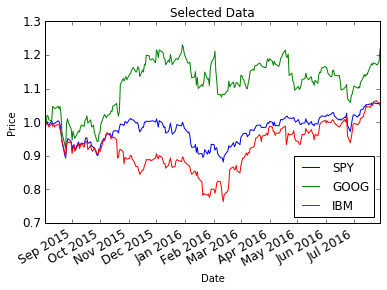

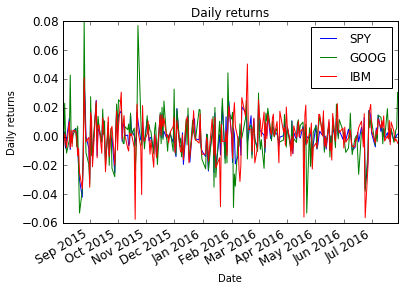

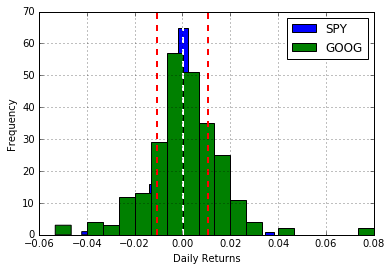

,SPY,GOOG,IBM
count,251.000000,251.000000,251.000000
mean,0.978929,1.113789,0.928092
std,0.040145,0.070917,0.065758
min,0.881380,0.922134,0.763456
25%,0.948778,1.081368,0.885113
50%,0.990767,1.129640,0.935368
75%,1.005409,1.169072,0.977787
max,1.057964,1.230335,1.063848


In [69]:
from matplotlib.pyplot import *
# Define a date range to fetch data
dates = pd.date_range('2015-08-03', '2016-07-29') # For exploration

# Choose stock symbols to read
symbols = ['SPY','GOOG','IBM']
    
# Get stock data
df = get_data(symbols, dates)

# Fill missing values
fill_missing_values(df)
#print df.head()

# Normalize data to make comparision
df = normalize_data(df)

# Slice and plot
plot_selected(df, ['SPY', 'GOOG','IBM'], '2015-08-03', '2016-07-29') # Visulization
    
# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
mean = daily_returns['SPY'].mean()
std = daily_returns['SPY'].std()
    
daily_returns['SPY'].hist(bins=20,label='SPY')
daily_returns['GOOG'].hist(bins=20,label='GOOG')
#daily_returns['IBM'].hist(bings=20,label='IBM')
plt.legend(loc='upper right')
xlabel('Daily Returns')
ylabel('Frequency')
    
plt.axvline(mean,color='w',linestyle='dashed',linewidth=2)
plt.axvline(std,color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='r',linestyle='dashed',linewidth=2)
plt.show()

df.describe()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


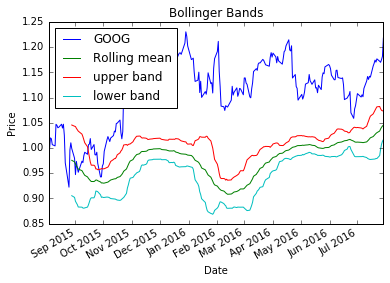

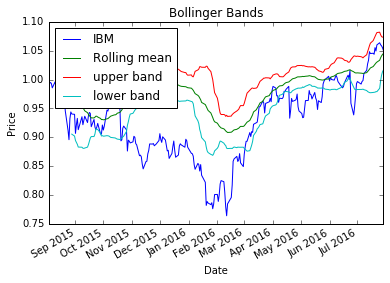

In [70]:
# Read data
dates = pd.date_range('2015-09-01', '2016-07-29') # Split to training data and testing data

# 1. Compute rolling mean for GOOG
rm_SPY = get_rolling_mean(df['SPY'], window=20)


# 2. Compute rolling standard deviation for GOOG
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute rolling mean for GOOG
rm_GOOG = get_rolling_mean(df['GOOG'], window=20)


# 4. Compute rolling standard deviation for GOOG
rstd_GOOG = get_rolling_std(df['GOOG'], window=20)

# 5. Compute rolling mean for GOOG
rm_IBM = get_rolling_mean(df['IBM'], window=20)


# 6. Compute rolling standard deviation for GOOG
rstd_IBM = get_rolling_std(df['IBM'], window=20)


# 7. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
# Plot raw GOOG values, rolling mean and Bollinger Bands
ax = df['GOOG'].plot(title="Bollinger Bands", label='GOOG')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

# Plot raw IBM values, rolling mean and Bollinger Bands
ax = df['IBM'].plot(title="Bollinger Bands", label='IBM')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

In [71]:
data = df
data.head()

,SPY,GOOG,IBM
2015-08-03,1.000000,1.000000,1.000000
2015-08-04,0.998046,0.996895,0.993006
2015-08-05,1.001335,1.019914,0.994896
2015-08-06,0.993136,1.018171,0.993118
2015-08-07,0.991229,1.006480,0.985494


2015-09-01    2.210579
2015-09-02   -1.849331
2015-09-03    0.879641
2015-09-04    0.611511
2015-09-08   -1.552353
Name: GOOG, dtype: float64


,Bollinger Bands,GOOG,SPY,Volume
2015-09-01,1.006870,597.789978,187.700239,3702100.0
2015-09-02,1.004538,614.340027,191.262990,2575600.0
2015-09-03,1.001652,606.250000,191.400018,1759600.0
2015-09-04,0.998912,600.700012,188.502829,2089000.0
2015-09-08,0.997401,614.659973,193.240111,2279500.0


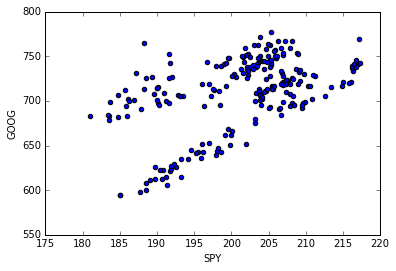

In [72]:
from matplotlib.pyplot import *

dates_train = pd.date_range('2015-09-01', '2016-07-29')#6-30
dates_test = pd.date_range('2016-07-01', '2016-07-29')

train_start_index ='2015-09-01'
train_end_index = '2016-07-29'#6-30

#test_start_index ='2016-07-01'
#test_end_index = '2016-07-29'

# Choose stock symbols to read
symbols = ['SPY','GOOG','IBM']
    
# Get stock data
train_data = get_data(symbols, dates_train)
test_data = get_data(symbols, dates_test)

ibm_volumes = pd.DataFrame(index=dates)
d_test = pd.read_csv('IBM.csv',index_col = 'Date',usecols=['Date','Volume'],parse_dates=True,na_values=['nan'])
ibm_volumes = ibm_volumes.join(d_test)
ibm_volumes = ibm_volumes.dropna()
train_ibm_volumes = ibm_volumes['Volume'].ix[train_start_index:train_end_index]

goog_volumes = pd.DataFrame(index=dates)
d_f = pd.read_csv('GOOG.csv',index_col = 'Date',usecols=['Date','Volume'],parse_dates=True,na_values=['nan'])
goog_volumes = goog_volumes.join(d_f)
goog_volumes = goog_volumes.dropna()
train_goog_volumes = goog_volumes['Volume'].ix[train_start_index:train_end_index]
#print train_goog_volumes
#test_goog_volumes = goog_volumes['Volume'].ix[test_start_index:test_end_index]

plt.scatter(train_data['SPY'],train_data['GOOG'])
xlabel('SPY')
ylabel('GOOG')

daily_returns_train = daily_returns['GOOG'].ix[train_start_index:train_end_index]
daily_returns_train_ibm = daily_returns['IBM'].ix[train_start_index:train_end_index]
#daily_returns_test = daily_returns['GOOG'].ix[test_start_index:test_end_index]

rm_GOOG_train = rm_GOOG.ix[train_start_index:train_end_index]
rm_IBM_train = rm_IBM.ix[train_start_index:train_end_index]
#rm_GOOG_test = rm_GOOG.ix[test_start_index:test_end_index]

rstd_GOOG_train = rstd_GOOG.ix[train_start_index:train_end_index]
rstd_IBM_train = rstd_IBM.ix[train_start_index:train_end_index]
#rstd_GOOG_test = rstd_GOOG.ix[test_start_index:test_end_index]

std_GOOG_train = daily_returns_train.std()
std_IBM_train = daily_returns_train_ibm.std()
#std_GOOG_test = daily_returns_test.std()

sharp_ratio_train = daily_returns_train / std_GOOG_train
sharp_ratio_train = sharp_ratio_train * (-1)
#sharp_ratio_test = daily_returns_test / std_GOOG_test

print sharp_ratio_train.head()

dataset = pd.DataFrame({ 'SPY' : train_data['SPY'],
                'GOOG' : train_data['GOOG'],
                'Bollinger Bands' : rm_GOOG_train,
                'Volume' : train_goog_volumes})
dataset_test = pd.DataFrame({ 'SPY' : train_data['SPY'],
                'IBM' : train_data['IBM'],
                'Bollinger Bands' : rm_IBM_train,
                'Volume' : train_ibm_volumes})
dataset.head()

#dataset_test.head()

In [73]:

#Features
predict_data_5days_ago = dataset[:-5]
predict_data_5days_ago.reset_index(drop=True,inplace=True)
print predict_data_5days_ago.head()

predict_ibm_5days_ago = dataset_test[:-5]
predict_ibm_5days_ago.reset_index(drop=True,inplace=True)
print predict_ibm_5days_ago.head()

#predict_data_3days_ago = dataset[:-3]
#predict_data_1days_ago = dataset[:-1]

#print predict_data_5days_ago.count()
#Targets
predict_result_5days_ago = dataset['GOOG'].ix[5:]
predict_result_5days_ago.reset_index(drop=True,inplace=True)
print predict_result_5days_ago.head()

predict_ibm_result_5days_ago = dataset_test['IBM'].ix[5:]
predict_ibm_result_5days_ago.reset_index(drop=True,inplace=True)
print predict_ibm_result_5days_ago.head()
#predict_result_3days_ago = dataset['GOOG'].ix[3:]
#predict_result_1days_ago = dataset['GOOG'].ix[1:]

#predict_data_test_5days_ago = dataset_test[:-5]
#predict_data_test_5days_ago.reset_index(drop=True,inplace=True)
#print predict_data_test_5days_ago

#predict_result_test_5days_ago = dataset_test['GOOG'].ix[5:]
#predict_result_test_5days_ago.reset_index(drop=True,inplace=True)
#print predict_result_test_5days_ago





   Bollinger Bands        GOOG         SPY     Volume
0         1.006870  597.789978  187.700239  3702100.0
1         1.004538  614.340027  191.262990  2575600.0
2         1.001652  606.250000  191.400018  1759600.0
3         0.998912  600.700012  188.502829  2089000.0
4         0.997401  614.659973  193.240111  2279500.0
   Bollinger Bands         IBM         SPY     Volume
0         0.963534  138.587365  187.700239  5272000.0
1         0.959865  140.889395  191.262990  4252000.0
2         0.956835  142.569767  191.400018  3603500.0
3         0.953207  139.578112  188.502829  4201100.0
4         0.950183  143.006856  193.240111  3933300.0
0    612.719971
1    621.349976
2    625.770020
3    623.239990
4    635.140015
Name: GOOG, dtype: float64
0    140.889395
1    142.006402
2    143.142840
3    141.472175
4    143.298254
Name: IBM, dtype: float64


In [74]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predict_data_5days_ago, predict_result_5days_ago, test_size=0.25, random_state=0)
print X_train.head()
print X_test.head()
print y_train.head()
print y_test.head()



     Bollinger Bands        GOOG         SPY     Volume
71          1.185491  738.869995  198.622952  2224400.0
22          0.981959  626.909973  191.853947  2684800.0
204         1.135555  701.869995  210.809998  2171400.0
45          1.077530  728.109985  206.966135  1706700.0
199         1.141809  710.359985  207.291992  1982500.0
     Bollinger Bands        GOOG         SPY     Volume
111         1.126453  684.119995  183.365769  2638000.0
101         1.147319  699.989990  186.196374  2194200.0
197         1.140509  718.270020  206.963697  1306100.0
183         1.119116  720.090027  206.794579  1929500.0
75          1.192416  749.429993  201.554870  1553400.0
71     739.309998
22     643.609985
204    692.099976
45     735.400024
199    701.869995
Name: GOOG, dtype: float64
111    697.349976
101    726.950012
197    695.940002
183    734.150024
75     748.400024
Name: GOOG, dtype: float64


In [75]:
from sklearn.cross_validation import train_test_split

X_ibm_train, X_ibm_test, y_ibm_train, y_ibm_test = train_test_split(predict_ibm_5days_ago, predict_ibm_result_5days_ago, test_size=0.25, random_state=0)
print X_ibm_train.head()
print X_ibm_test.head()
print y_ibm_train.head()
print y_ibm_test.head()


     Bollinger Bands         IBM         SPY     Volume
71          0.881480  131.936088  198.622952  5333800.0
22          0.923208  140.432875  191.853947  3054400.0
204         0.999347  155.350006  210.809998  3969400.0
45          0.921940  137.567495  206.966135  3516900.0
199         0.989872  151.059998  207.291992  2449100.0
     Bollinger Bands         IBM         SPY     Volume
111         0.803470  119.041195  183.365769  6469100.0
101         0.836681  118.592467  186.196374  5026400.0
197         0.987779  151.059998  206.963697  2865800.0
183         0.960173  148.309998  206.794579  2929300.0
75          0.886180  134.073412  201.554870  4089500.0
71     132.259616
22     148.018851
204    151.779999
45     132.377277
199    155.350006
Name: IBM, dtype: float64
111    131.184005
101    122.278875
197    154.050003
183    152.509995
75     135.544053
Name: IBM, dtype: float64


Train time: 0.00104212760925
Test time: 0.00042986869812
R^2 Score: 0.73


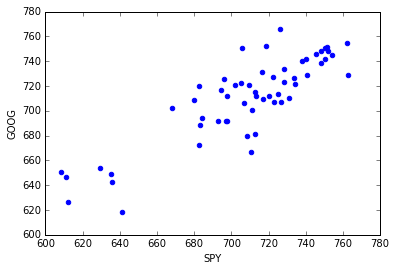

In [76]:
from sklearn.linear_model import LinearRegression
from time import time
regr = LinearRegression()
start = time()
regr.fit(X_train,y_train)
end = time()
train_time = end - start
#plt.scatter(X_train,y_train,color='black')

start = time()
regr.predict(X_test)
end = time()
test_time = end - start

plt.scatter(y_test,regr.predict(X_test),color='blue')
xlabel('SPY')
ylabel('GOOG')

print 'Train time: {}'.format(train_time)
print 'Test time: {}'.format(test_time)
print('R^2 Score: %.2f' % regr.score(X_test, y_test))


R^2 Score: 0.73


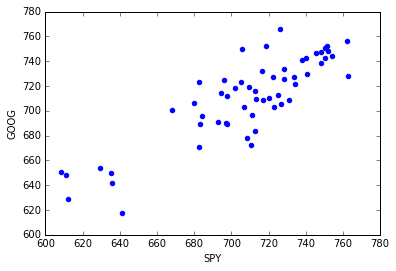

In [77]:
from sklearn.linear_model import Lasso
clf = Lasso(random_state=0)
clf.fit(X_train,y_train)
#plt.scatter(X_train,y_train,color='black')
plt.scatter(y_test,clf.predict(X_test),color='blue')
xlabel('SPY')
ylabel('GOOG')

print('R^2 Score: %.2f' % clf.score(X_test, y_test))

Train time: 0.0304279327393
Test time: 0.000250101089478
R^2 Score: 0.83


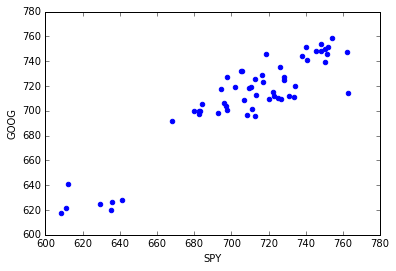

In [78]:
from sklearn.ensemble import BaggingRegressor
clf = BaggingRegressor(random_state=0)
start = time()
clf.fit(X_train,y_train)
end = time()
train_time = end - start
#plt.scatter(X_train,y_train,color='black')

start = time()
regr.predict(X_test)
end = time()
test_time = end - start
plt.scatter(y_test,clf.predict(X_test),color='blue')
xlabel('SPY')
ylabel('GOOG')

print 'Train time: {}'.format(train_time)
print 'Test time: {}'.format(test_time)
print('R^2 Score: %.2f' % clf.score(X_test, y_test))


In [79]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.cross_validation import StratifiedShuffleSplit

#sss = StratifiedShuffleSplit(y_train, 3, test_size=0.5, random_state=0)
# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': [200,300,500],'random_state':[0], 'max_features':[1,2,3,4]}

# TODO: Initialize the classifier
clf_t = BaggingRegressor()

r2_scorer = make_scorer(r2_score,pos_label=None)

# TODO: Perform grid search on the classifier using the r2_scorer as the scoring method
grid_obj = GridSearchCV(clf_t, parameters,cv = 10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Print the parameters
print clf.get_params(), '\n'


# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training R^2 score of {:.4f}.".format(clf.score(X_train, y_train))
print "Tuned model has a testing R^2 score of {:.4f}.".format(clf.score(X_test, y_test))



{'warm_start': False, 'max_samples': 1.0, 'base_estimator': None, 'n_jobs': 1, 'verbose': 0, 'bootstrap': True, 'oob_score': False, 'n_estimators': 300, 'random_state': 0, 'max_features': 3, 'bootstrap_features': False} 

Tuned model has a training R^2 score of 0.9766.
Tuned model has a testing R^2 score of 0.8540.


## Result

    Predict Stock Price  True Stock Price
5            626.810003        635.979980
7            625.361502        629.250000
8            623.530567        635.440002
12           629.558419        611.969971
15           619.772295        608.419983


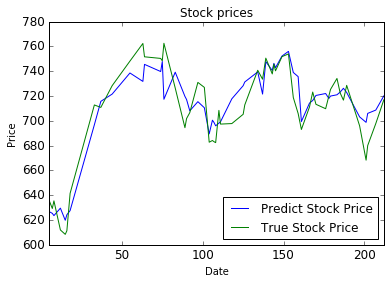

In [80]:
y_pred = clf.predict(X_test)
predict_and_true = pd.DataFrame({'True Stock Price': y_test,'Predict Stock Price': y_pred})
predict_and_true.sort_index(axis=0,ascending=True,inplace=True)
print predict_and_true.head()
plot_data(predict_and_true)

In [81]:
pridict_and_true.describe()

,Predict Stock Price,True Stock Price
count,225.000000,225.000000
mean,657.367999,141.326609
std,17.488308,10.326084
min,628.675984,116.723557
25%,633.242854,134.102824
50%,668.509859,141.593558
75%,670.166924,148.460007
max,700.123559,162.649994


In [82]:
r2_score(y_test, y_pred)

0.85401843169612013

# Robust Validation 

In [83]:
clf_v = BaggingRegressor(random_state = 0, max_features= 3,n_estimators= 300)
clf_v.fit(X_ibm_train, y_ibm_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=3, max_samples=1.0,
         n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
         verbose=0, warm_start=False)

    Predict Stock Price  True Stock Price
5            142.448256        144.153017
7            143.225609        140.364876
8            141.259493        142.278369
12           139.900933        141.248777
15           140.025249        140.811687


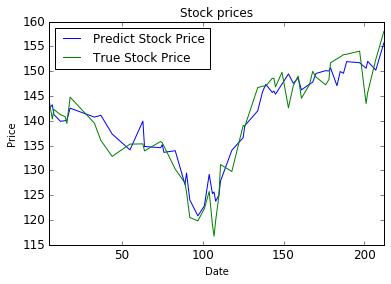

In [84]:
y_ibm_pred = clf_v.predict(X_ibm_test)
predict_and_true = pd.DataFrame({'True Stock Price': y_ibm_test,'Predict Stock Price': y_ibm_pred})
predict_and_true.sort_index(axis=0,ascending=True,inplace=True)
print predict_and_true.head()
plot_data(predict_and_true)

In [85]:
predict_and_true.describe()

,Predict Stock Price,True Stock Price
count,57.000000,57.000000
mean,140.556265,140.006655
std,9.232766,10.606436
min,120.824865,116.723557
25%,134.136296,133.936153
50%,141.999467,142.278369
75%,147.781772,148.309998
max,155.711399,158.020004


In [86]:
r2_score(y_ibm_test, y_ibm_pred)

0.90616733945390615